# **Solution of Simultaneous Algebraic Equations.**  Jacobi’s iteration method, Gauss Elimination method by pivoting, Gauss – Jordan method, Gauss – Seidel method.  Relaxation method, Ill-Conditioned Equations, Convergence of iteration methods.

1. Jacobi's Iteration Method

How it works: The Jacobi method is an iterative method for solving a system of linear equations, where new values ​​of variables are calculated based on old values ​​from the previous iteration. For each equation, a separate variable is solved, and the value of that variable is updated using previous approximations.

In [40]:
import numpy as np

def jacobi_method(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0
    for _ in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            summation = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - summation) / A[i][i]
        # Checking if we have achieved the desired accuracy
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
        print(x)
    return x

# Example
A = np.array([[20, -1, -2], [3, 20, -1], [2, -3, 20]], dtype=float)
b = np.array([17, -18, 25], dtype=float)
x0 = np.zeros(len(b))

# Solution by Jacobi method
root = jacobi_method(A, b, x0, tol=1e-6, max_iter=100)
print(f"Root: {np.round(root,1)}")

#x = np.linalg.solve(A, b)
#x

[ 0.85 -0.9   1.25]
[ 0.93  -0.965  1.03 ]
[ 0.90475 -0.988    1.01225]
[ 0.901825 -0.9851    1.011325]
[ 0.9018775 -0.9847075  1.0120525]
[ 0.90196988 -0.984679    1.01210613]
[ 0.90197666 -0.98469018  1.01210116]
[ 0.90197561 -0.98469144  1.01209881]
Root: [ 0.9 -1.   1. ]


1. The Jacobi method starts with initial guesses for all variables.
2. For each equation, we solve for one variable using the values ​​from the previous iteration for all other variables.
3. The method continues until the difference between the old and new guesses is less than a predetermined accuracy.
4. Importantly, the Jacobi method converges if the system of equations satisfies a certain convergence condition.

2. Gauss Elimination Method

How it works: The Gauss Elimination Method solves a system of linear equations by eliminating variables. It transforms the system into an upper triangular matrix and then uses back substitution to find the solution.

In [16]:
def gauss_elimination(A, b):
    n = len(b)
    # Direct move (transformation to upper triangular matrix)
    for i in range(n):
        # Finding the maximum element to prevent division by 0
        max_row = np.argmax(abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]

        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

# Example
A = np.array([[10, -2, 3], [-2, 10, -1], [3, -1, 10]], dtype=float)
b = np.array([3, 15, 27], dtype=float)

# Solution by Gauss elimination method
root = gauss_elimination(A, b)
print(f"Root: {np.round(root,2)}")

Root: [-0.23  1.75  2.94]


1. Gauss's method involves reducing a system of equations to upper triangular form step by step, eliminating one variable at a time.
2. It is important how the leading element (with the maximum value) is selected to reduce rounding errors.
3. Once the matrix is ​​reduced to upper triangular form, back substitution is used to find the values ​​of the variables.

3. Gauss-Jordan Method

How it works: The Gauss-Jordan method is a modification of the Gauss method, where the elimination of variables occurs not only in the lower part of the matrix, but also in the upper part. The result is a diagonal matrix, from which the values ​​of the variables can be immediately extracted.

In [17]:
def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack([A, b.reshape(-1, 1)])

    # Direct move (transformation to diagonal matrix)
    for i in range(n):
        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]  # Normalize the string
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]
            print(augmented_matrix[:, -1])
    return augmented_matrix[:, -1]

# Example
A = np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]], dtype=float)
b = np.array([6, 25, -11, 15], dtype=float)

# Solution by Gauss Jordan method
root = gauss_jordan(A, b)
print(f"Root: {root}")

[  0.6  25.  -11.   15. ]
[  0.6  25.6 -11.   15. ]
[  0.6  25.6 -12.2  15. ]
[  0.6  25.6 -12.2  15. ]
[  0.83486239   2.34862385 -12.2         15.        ]
[  0.83486239   2.34862385 -12.2         15.        ]
[  0.83486239   2.34862385 -10.32110092  15.        ]
[  0.83486239   2.34862385 -10.32110092   7.95412844]
[ 1.04326923  2.34862385 -1.08173077  7.95412844]
[ 1.04326923  2.26923077 -1.08173077  7.95412844]
[ 1.04326923  2.26923077 -1.08173077  7.95412844]
[ 1.04326923  2.26923077 -1.08173077  7.11057692]
[ 1.          2.26923077 -1.08173077  1.        ]
[ 1.          2.         -1.08173077  1.        ]
[ 1.  2. -1.  1.]
[ 1.  2. -1.  1.]
Root: [ 1.  2. -1.  1.]


1. The Gauss-Jordan method improves on the Gauss method, since after reducing the system to an upper triangular form, we also reduce it to a diagonal form.
2. Unlike the Gauss method, here the reverse substitution is not required, since in the process of eliminating variables we immediately obtain a solution.

4. Gauss-Seidel Method

Working principle: The Gauss-Seidel method is iterative, but, unlike the Jacobi method, it uses new values ​​of variables immediately after their calculation. This improves the convergence of the method if the system of equations satisfies the convergence conditions.

In [18]:
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0
    for _ in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            summation = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - summation) / A[i][i]
        # Checking the stopping condition
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
        print(x)
    return x

# Example
A = np.array([[4, -1, 0, 0], [-1, 4, -1, 0], [0, -1, 4, -1], [0, 0, -1, 3]], dtype=float)
b = np.array([15, 10, 10, 10], dtype=float)
x0 = np.zeros(len(b))

# Solution by Gauss-Seidel method
root = gauss_seidel(A, b, x0, tol=1e-6, max_iter=100)
print(f"Root: {np.round(root,1)}")

[3.75     3.4375   3.359375 4.453125]
[4.609375   4.4921875  4.73632812 4.91210938]
[4.87304688 4.90234375 4.95361328 4.98453776]
[4.97558594 4.9822998  4.99170939 4.99723646]
[4.99557495 4.99682109 4.99851439 4.9995048 ]
[4.99920527 4.99942991 4.99973368 4.99991123]
[4.99985748 4.99989779 4.99995225 4.99998408]
[4.99997445 4.99998168 4.99999144 4.99999715]
[4.99999542 4.99999671 4.99999847 4.99999949]
[4.99999918 4.99999941 4.99999972 4.99999991]
Root: [5. 5. 5. 5.]


1. The Gauss-Seidel method updates each variable immediately after its calculation, which speeds up convergence.
2. The method converges efficiently for diagonally dominant matrices (where 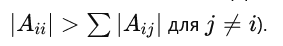
3. Iterations continue until the change between two successive solutions is less than a specified accuracy.

5. Relaxation Method

Working principle: The relaxation method is an extension of the Gauss-Seidel method, where each new value of the variable is adjusted using the relaxation parameter ω to improve convergence.

In [20]:
def relaxation_method(A, b, x0, tol, max_iter, omega):
    n = len(b)
    x = x0
    for _ in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            summation = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - summation) / A[i][i]
        # Checking the stopping condition
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
        print(x)
    return x

# Example
A = np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]], dtype=float)
b = np.array([6, 25, -11, 15], dtype=float)
x0 = np.zeros(len(b))

# Solution by relaxation method
root = relaxation_method(A, b, x0, tol=1e-6, max_iter=100, omega=1.2)
print(f"Root: {np.round(root)}")

[ 0.72        2.80581818 -1.15610182  0.81396655]
[ 1.19016262  1.90343576 -1.04833039  1.07341104]
[ 0.96197906  1.98586727 -0.9740955   0.99556319]
[ 0.99969118  2.00707085 -1.0047907   0.99698688]
[ 1.00206003  1.99927405 -0.99998496  1.00093156]
[ 0.99949727  1.99978711 -0.99979611  0.99994007]
[ 1.00002607  2.00008728 -1.00004375  0.99996615]
[ 1.00001576  1.99999057 -1.00000023  1.00001098]
[ 0.99999577  1.99999781 -0.99999789  0.99999911]
[ 1.00000008  2.00000097 -1.00000043  0.99999968]
[ 1.0000002   1.99999989 -1.00000002  1.00000011]
Root: [ 1.  2. -1.  1.]


1. The relaxation parameter ω (usually 1<ω<2) controls the updating of variables by increasing or decreasing the step.
2. Values ​​of ω greater than 1 speed up convergence, but too large values ​​can lead to divergence.
3. The method is especially useful for ill-conditioned systems of equations.

6. Ill-Conditioned Systems

Example: Analysis of an Ill-Conditioned System

Consider the system: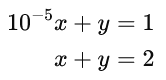

In [46]:
def ill_conditioned_example():
    A = np.array([[1e-5, 1], [1, 1]], dtype=float)
    b = np.array([1, 2], dtype=float)

    # Modified coef.
    A_mod = np.array([[1e-5, 1.1], [1.002, 1.001]], dtype=float)
    b_mod = np.array([1, 2.002], dtype=float)

    # Solution via numpy
    try:
        solution = np.linalg.solve(A, b)
        print(f"Solution: {solution}")

        solution_mod = np.linalg.solve(A_mod, b_mod)
        print(f"Solution with modified coef.: {solution_mod}")
    except np.linalg.LinAlgError as e:
        print(f"Error in solution: {e}")

# Using function
ill_conditioned_example()

Solution: [1.00001 0.99999]
Solution with modified coef.: [1.08983026 0.909081  ]


1. An ill-conditioned system has a determinant or coefficient values ​​close to zero. This leads to numerical errors.
2. The example shows that small changes in the coefficients or values ​​can significantly change the result.

7. Convergence of iterative methods

Example: Convergence analysis for Jacobi and Gauss-Seidel methods

In [28]:
def check_convergence(A):
    D = np.diag(np.abs(A))  # Diagonal elements
    S = np.sum(np.abs(A), axis=1) - D  # Sum of off-diagonal elements
    return np.all(D > S)  # Checking the diagonal dominance condition

# Example of a matrix
A1 = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]], dtype=float)
A2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=float)

print(f"Martix A1: {'converges' if check_convergence(A1) else 'does not converge'}")
print(f"Martix A2: {'converges' if check_convergence(A2) else 'does not converge'}")

Martix A1: converges
Martix A2: does not converge


1. Diagonal dominance of the matrix is ​​a key convergence condition for the Jacobi and Gauss-Seidel methods.
2. The code checks whether the condition 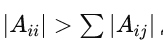 holds for each row.